# Imports

In [1]:
from FLController import *
from ILQGController import *
from LQGController import *
import plot as plot

# Reaching towards Targets in all direction

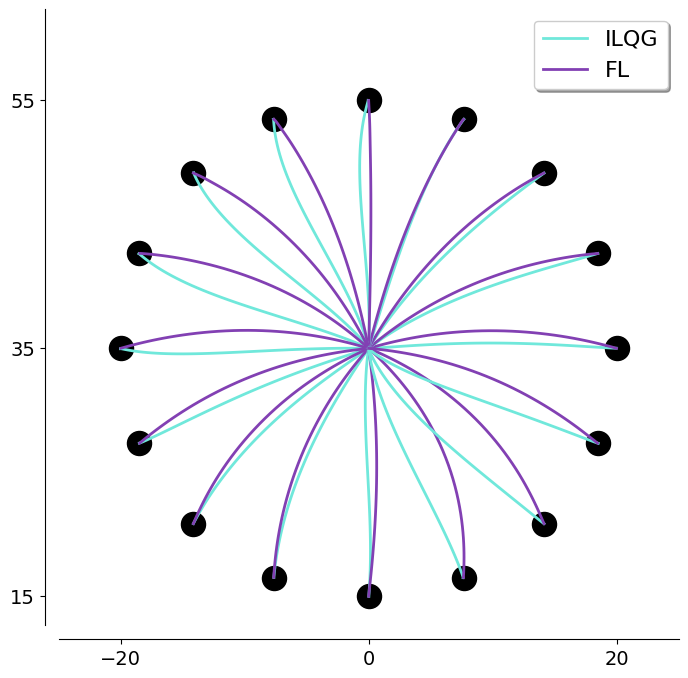

In [2]:
def PlotReachinginAllDirections(Feedback_Linearization,ILQG,K=60,Duration = .6,L=20,start = [0,35],w1 = 1e7,w2 = 1e4,r1 = 1e-4,Noise = True):
    fig, ax = plt.subplots(figsize = (8,8),dpi = 100)

    NUMTARG = 16
    TARG = []

    theta = np.linspace(0,2*pi,NUMTARG,endpoint=False)
    for i in range(NUMTARG):
        TARG.append(start+np.array([L*cos(theta[i]),L*sin(theta[i])]))

    for i in range(NUMTARG):
        plt.scatter(TARG[i][0],TARG[i][1],color = "black",s = 300)
        #plt.text(TARG[i][0]-.5,TARG[i][1]-.8,str(i+1),color = "red",size =  10)
                #plt.plot(np.linspace(start[0],TARG[i][0]),np.linspace(start[1],TARG[i][1]),label = str(i+1))

        targets = TARG[i]
        xILQG,yILQG,_,_ = ILQG(Duration,w1,w2,r1,targets,K,start,Noise = Noise,plot = False)
        X,Y = Feedback_Linearization(Duration,w1,w1,w2,w2,r1,r1,targets,start,Num_iter = K,Activate_Noise=Noise,Delay=0,plot = False)
        plt.plot(xILQG,yILQG,label = "ILQG",color = (0.44,0.91,0.86),linewidth = 2)
        plt.plot(X,Y,label = "FL",color = (0.51,0.25,0.7),linewidth = 2)
        plt.axis("equal")

        
        MultipleLabel(title = "")
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_position(('outward', 10))  # Move x-axis 10 points downward
        ax.spines['left'].set_position(('outward', 10))   # Move y-axis 10 points rightward
        plt.xlim(-25,25)
        plt.ylim(10,65)
        plt.xticks([-20,0,20])
        plt.yticks([15,35,55])
        
        ax.tick_params(axis='both', which='major', labelsize=14)

PlotReachinginAllDirections(Feedback_Linearization,ILQG)

# LQG is not able to account for nonlinearities

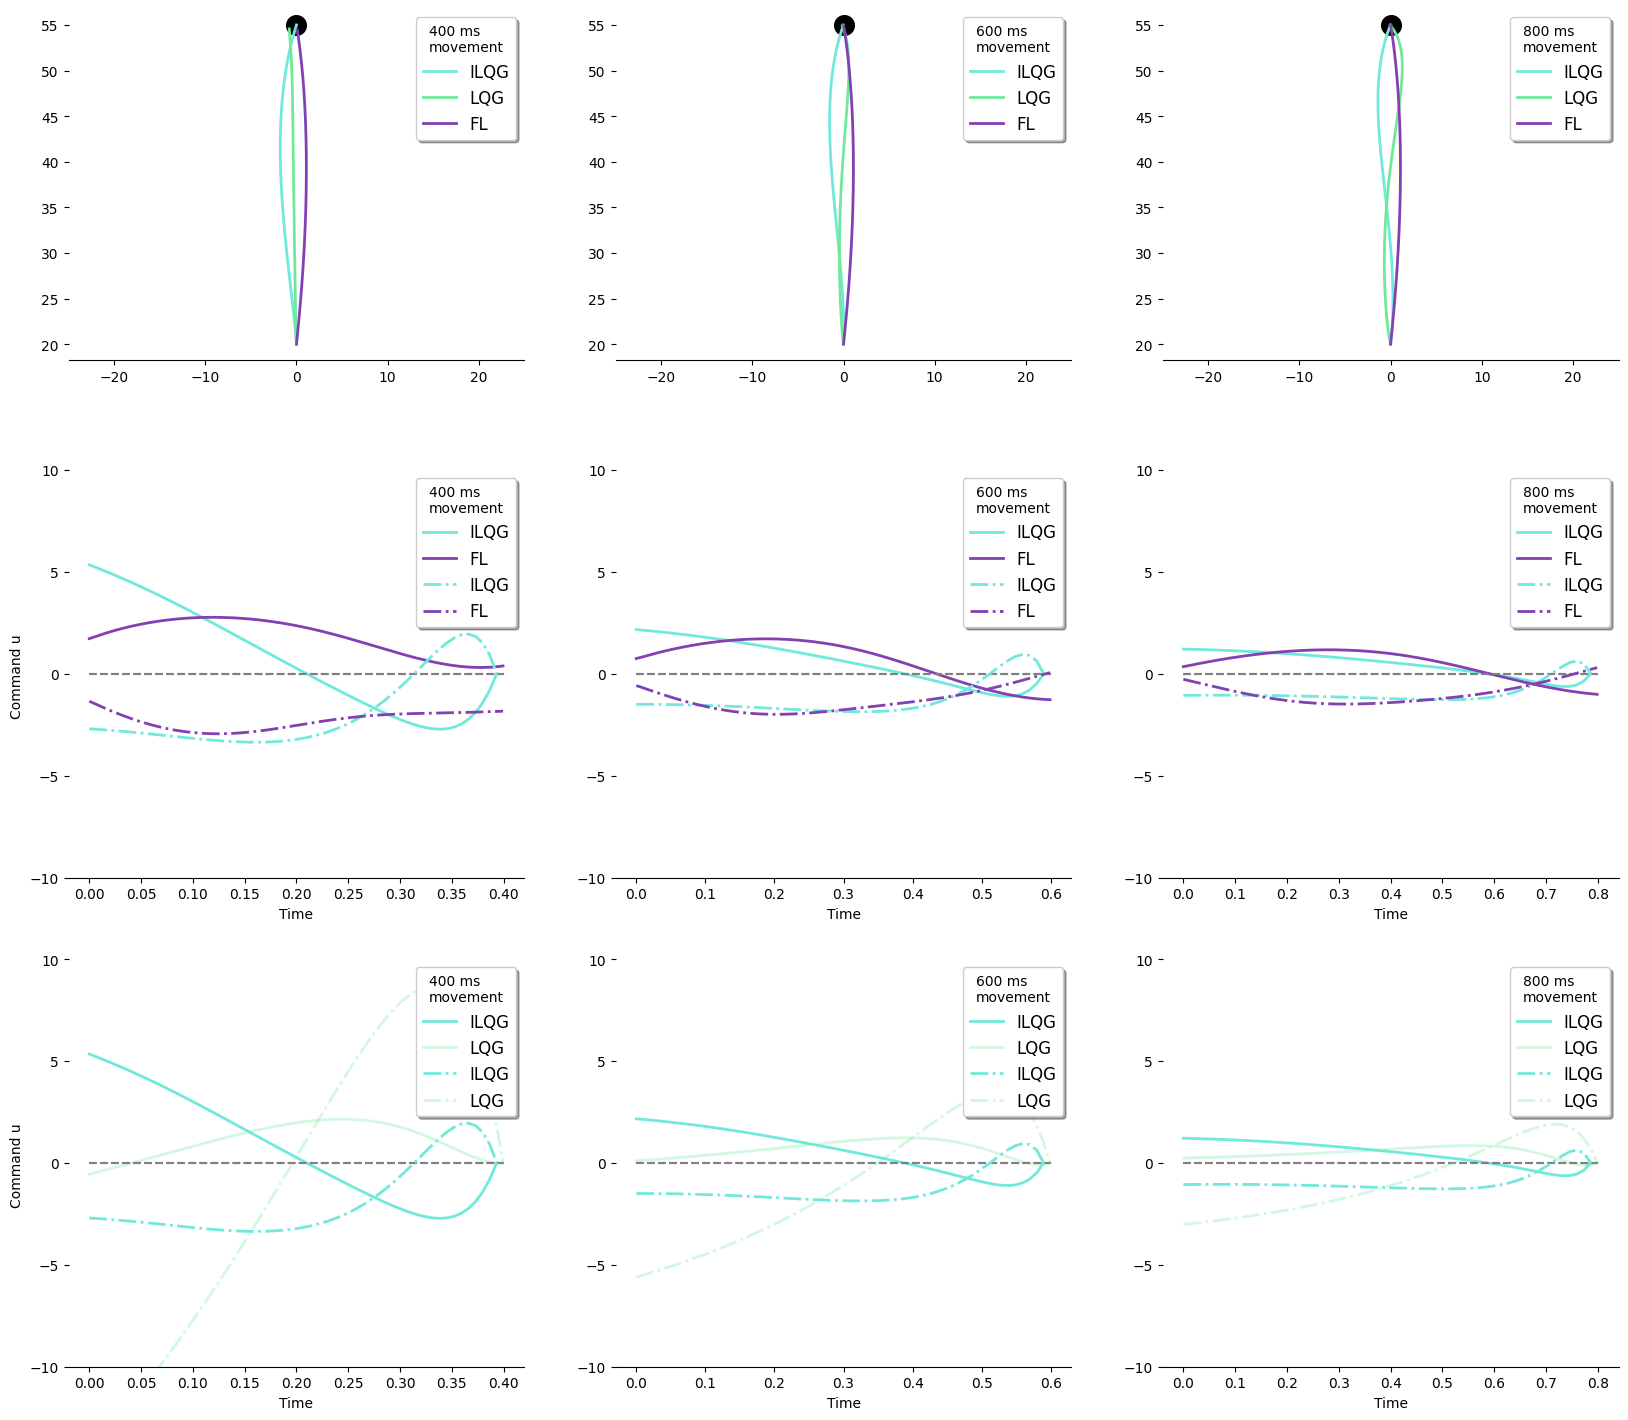

In [34]:
def diffNonlin():

    fig,ax = plt.subplots(3,3,figsize = (20,18))

    i = 0
    for MovementDuration in [.4,.6,.8]:
        for l in range(3):
            ax[l,i].spines["right"].set_visible(False)
            ax[l,i].spines["left"].set_visible(False)
            ax[l,i].spines["top"].set_visible(False)
        XLQG,YLQG,ULQG = LQG(MovementDuration,1e6,1e6,1e3,1e3,1e-3,1e-3,targets = [0,55],starting_point = [0,20],plot = False,Num_iter=600,Showu=True)
        XILQG,YILQG,UILQG,_ = ILQG(MovementDuration,1e6,1e3,1e-3,K = 60,targets = [0,55],start = [0,20],plot = False)
        XFL,YFL,UFL = Feedback_Linearization(MovementDuration,1e6,1e6,1e3,1e3,1e-3,1e-3,targets = [0,55],starting_point = [0,20],plot = False,Showu=True,Num_iter=600,Delay = 0)

        ax[0,i].plot(XILQG,YILQG,label = "ILQG",color = (0.44,0.91,0.86),linewidth = 2)
        ax[0,i].plot(XLQG,YLQG,label = "LQG",color = (0.44,0.91,0.6),linewidth = 2)
        ax[0,i].plot(XFL,YFL,label = "FL",color = (0.51,0.25,0.7),linewidth = 2)
        for k in range(2):
            ls = "-" if k == 0 else "-."
            for l in range(1,3):
                ax[l,0].set_ylabel("Command u ")
                ax[l,i].set_yticks([-10,-5,0,5,10])
                ax[l,i].set_xlabel("Time")
                ax[l,i].plot(np.linspace(0,MovementDuration,100),np.zeros(100),color = "grey",linestyle = "--")
                ax[l,i].plot(np.linspace(0,MovementDuration,60)[:-1],UILQG[:,k],label = "ILQG",color = (0.44,0.91,0.86),linewidth = 2,linestyle = ls)
            
            ax[1,i].set_ylim(np.min(UFL)*2,np.max(UFL)*2)
            
            ax[2,i].plot(np.linspace(0,MovementDuration,600)[:-1],ULQG[:,k],label = "LQG",color = (0.44,0.91,0.6),linewidth = 2,alpha = .3,linestyle = ls)
            ax[1,i].plot(np.linspace(0,MovementDuration,600)[:-1],UFL[:,k],label = "FL",color = (0.51,0.25,0.7),linewidth = 2,linestyle = ls)
            
        ax[1,i].set_ylim(-10,10)
        ax[2,i].set_ylim(-10,10)
        ax[0,i].scatter([0],[55],color = "black",s = 200)
        ax[0,i].set_xlim(-25,25)
        ax[0,i].set_aspect("equal")
        for l in range(3):
            ax[l,i].legend(fontsize = 12,title = f"{int(MovementDuration*1000)} ms \nmovement",title_fontsize = 10,frameon = True,shadow = True,fancybox = True,loc = "upper right")
        i+=1
diffNonlin()

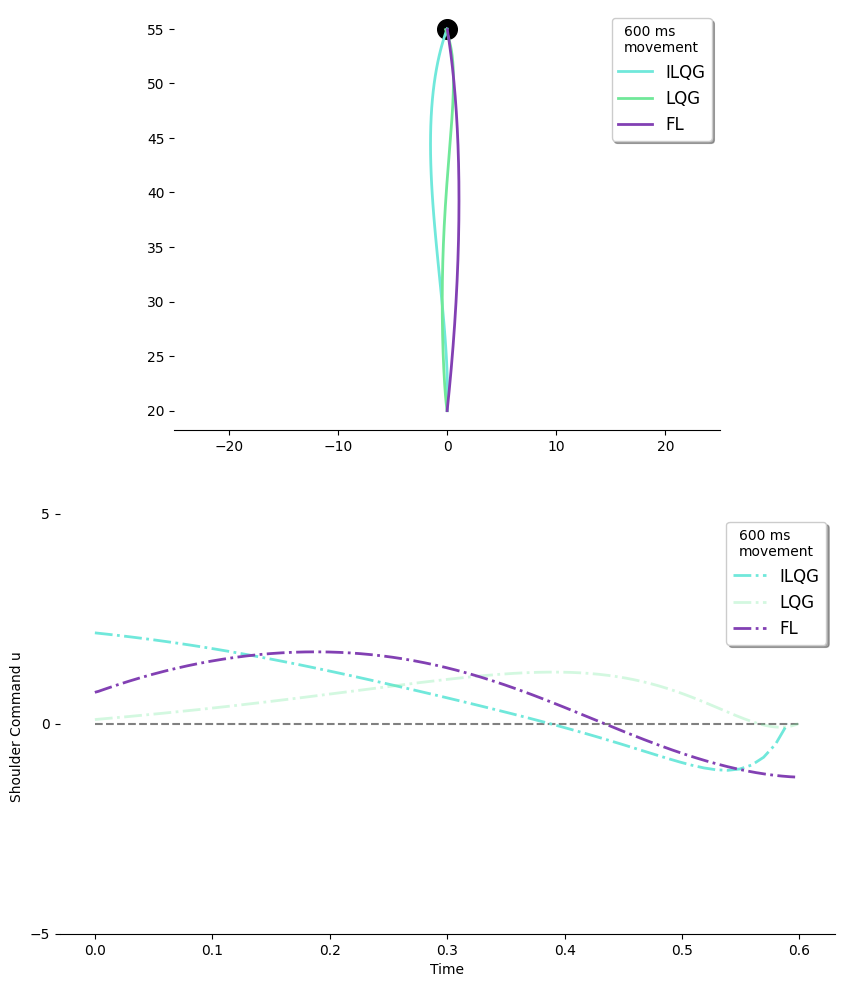

In [44]:
def diffNonlin2():

    fig,ax = plt.subplots(2,1,figsize = (10,12))

    i = 0
    for MovementDuration in [.6]:
        for l in range(2):
            ax[l].spines["right"].set_visible(False)
            ax[l].spines["left"].set_visible(False)
            ax[l].spines["top"].set_visible(False)
        XLQG,YLQG,ULQG = LQG(MovementDuration,1e6,1e6,1e3,1e3,1e-3,1e-3,targets = [0,55],starting_point = [0,20],plot = False,Num_iter=600,Showu=True)
        XILQG,YILQG,UILQG,_ = ILQG(MovementDuration,1e6,1e3,1e-3,K = 60,targets = [0,55],start = [0,20],plot = False)
        XFL,YFL,UFL = Feedback_Linearization(MovementDuration,1e6,1e6,1e3,1e3,1e-3,1e-3,targets = [0,55],starting_point = [0,20],plot = False,Showu=True,Num_iter=600,Delay = 0)

        ax[0].plot(XILQG,YILQG,label = "ILQG",color = (0.44,0.91,0.86),linewidth = 2)
        ax[0].plot(XLQG,YLQG,label = "LQG",color = (0.44,0.91,0.6),linewidth = 2)
        ax[0].plot(XFL,YFL,label = "FL",color = (0.51,0.25,0.7),linewidth = 2)
        for k in range(1):
            ls ="-."
            ax[1].set_ylabel("Shoulder Command u ")
            ax[1].set_yticks([-10,-5,0,5,10])
            ax[1].set_xlabel("Time")
            ax[1].plot(np.linspace(0,MovementDuration,100),np.zeros(100),color = "grey",linestyle = "--")
            ax[1].plot(np.linspace(0,MovementDuration,60)[:-1],UILQG[:,k],label = "ILQG",color = (0.44,0.91,0.86),linewidth = 2,linestyle = ls)
            
            ax[1].set_ylim(np.min(UFL)*2,np.max(UFL)*2)
            
            ax[1].plot(np.linspace(0,MovementDuration,600)[:-1],ULQG[:,k],label = "LQG",color = (0.44,0.91,0.6),linewidth = 2,alpha = .3,linestyle = ls)
            ax[1].plot(np.linspace(0,MovementDuration,600)[:-1],UFL[:,k],label = "FL",color = (0.51,0.25,0.7),linewidth = 2,linestyle = ls)
            
        ax[1].set_ylim(-5,5)
        ax[0].scatter([0],[55],color = "black",s = 200)
        ax[0].set_xlim(-25,25)
        ax[0].set_aspect("equal")
        for l in range(2):ax[l].legend(fontsize = 12,title = f"{int(MovementDuration*1000)} ms \nmovement",title_fontsize = 10,frameon = True,shadow = True,fancybox = True,loc = "upper right")
diffNonlin2()

# Studying the impact of Model Errors

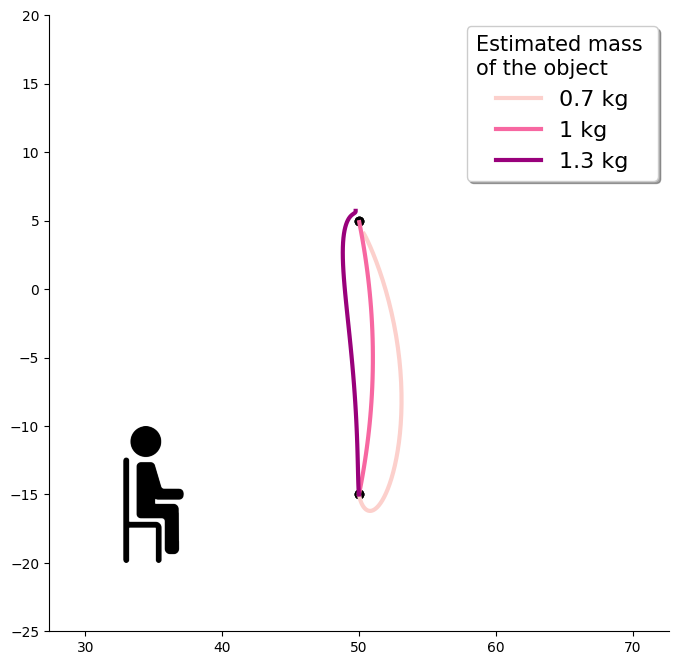

In [29]:
def ObjectMassEstimate():
    D=20
    alpha = 0
    Xst = 50
    Yst = -15
    Duration = .6    
    r = 1e-6
    w1 = 1e3
    fig,ax = plt.subplots(figsize = (8,8))
    for mass in [0.7,1,1.3]:
        color = plt.get_cmap('RdPu')((mass-.5))
        X,Y = Feedback_Linearization_with_Gravity(Duration=Duration,w1 = w1,w2 = w1,w3 = 1e3,w4 = 1e3,r1 = r,r2 = r,targets = [Xst,Yst+D],starting_point = [Xst,Yst],Num_iter = 60,Delay=0,Activate_Noise=False,ObjectMass=1,EstimatedObjectMass=mass,plot = False)
        plt.plot(X,Y,color = color,linewidth = 3,label = f"{mass} kg")
        plt.axis("equal")
        plt.scatter([Xst,Xst],[Yst,Yst+D],color= "black")
    plt.ylim(Yst-10,Yst+D+15)
    plt.xlim(Xst-10,Xst+10)
    plt.legend(fontsize = 16,title = "Estimated mass \nof the object",title_fontsize = 15,frameon = True,shadow = True,fancybox = True)
    image = mpimg.imread("img/assis-sur-une-chaise.png")
    ax.imshow(image,extent = [30,40,-20,-10])

ObjectMassEstimate()